#            Supervised Learning Technique - Regression Analysis 

### Objective :- 

Develop My Regression Function which handles multiple output datasets, implements simple linear and Polynomial regression. Scalling and Regularization of the dataset is implemented. The function written is then applied to manually generated one-Dimension equation for various noise level. Finally the performance of the function is evaluated on the UCI datasets - AIRFOIL, SLUMP AND YACHT HYDRODYNAMICS data set. Mean squared error for each of the scenario is recorded and Graphs have been plotted when neccessary.

### Importing Pacakges 
1. numpy - Genaralized array processing module in python.
2. pandas - data wrangling and data manupulation.
3. matplotlib - Graph plotting librarary
4. SKlearn Preprocessing polynomialFeatures - Polynomial Features of a dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
import warnings
from statistics import mean 
warnings.filterwarnings('ignore')

## My Regression Function ALgorithm

### Step1: Scaling and Regularization:-

Using **Normalization** for Scaling - Subtracting by mean of each column and dividing by standard deviation(Standardization).
Using **Gaussian regularization** technique.
    Gaussian Regularization - exp(x − μ j )^2/2s^2

### Step2: Spliiting the data input and target variables:-

Splitting the training data input and ouput variables into **5 equal sets for cross validation**. Get the splits for **Polynomial and Simple Linear regression** models in this step.


### Step3:- Calculating the coeffecients using the cross validation:-

In cross validation one split will be validation set and rest splits will be used to calculate the set of coeffecients/weights for **Simple and Polynomial linear regression**. Using the formula given below:- 
                
Φ † ≡ ((Φ T. Φ)^− 1 ).(Φ T ).(t k)

Repeat this process for 5 times i.e. to obtain a **5 fold cross validation**.

### Step4:- Selection of the best model:-

Getting the best coefficient set for both **Simple and Polynomial models by comparing the mean square error**. Apply the model to whole training data we compare the mean square error. Select the model with least mean square error. 

### Step5:- Apply the selected model to Test Dataset:-

After comparison of the Mean square errors obtained, the coeffecients obtained is applied to the entire test set and predtictions are obtained.
 
 MSE = frac{1}{N}sum_{i=1}^{N}(Y_i -{Y}_i hat)^2 

In [178]:
def my_regression(X_train, X_test, noutputs):
    #scaling X_train
    for col in X_train.columns:
        X_train[col] = (X_train[col]-X_train[col].mean())/X_train[col].std() #scaling of X_train
        X_train[col] = np.exp(-(X_train[col]-X_train[col].mean())**2/
                              (2*(X_train[col].std())**2)) #gaussian regularization
    
    #scaling X_test
    for col in X_test.columns: 
        X_test[col] = (X_test[col]-X_test[col].mean())/X_test[col].std() #scaling of X_test
        X_test[col] = np.exp(-(X_test[col]-X_test[col].mean())**2/
                             (2*(X_test[col].std())**2)) #gaussian regularization
        
    values = X_train.values
    xvalues=[]
    yvalues = []

    for i in range(values.shape[0]):
        xvalues.append((values[i][:-noutputs]).tolist()) #input variables
        yvalues.append((values[i][-noutputs:]).tolist()) #target variables
    
    #Performing Polynomial Regression for Model Selection
    xvalues = np.asarray(xvalues)
    yvalues = np.asarray(yvalues)
    poly = PolynomialFeatures(1)
    poly_xtrain = poly.fit_transform(xvalues)
    poly_xtest = pd.DataFrame(poly.transform(X_test))
    
    #COncatinating ones
    ones = np.ones(len(xvalues)).reshape(-1,1)
    xvalues= np.concatenate((ones,xvalues), axis=1) #adding column of 1s
    X_test.insert(0,'ones',np.ones(len(X_test)).reshape(-1,1)) #adding column of 1s to test set
    
    #Selection of nsplit for cross validation
    nsplits = 5
    if len(X_train)<nsplits:
        nsplits = 2
    else:
        nsplits = 5
    
    xsplits = np.array_split(xvalues,nsplits) #split input into n subsets
    ysplits = np.array_split(yvalues, nsplits) #split target into n subsets
    poly_xsplits = np.array_split(poly_xtrain, nsplits) #split target into n subsets
    
    predictions=[]
    for outputs in range(noutputs):
        final_coeff =[]
        final_coeff_poly=[]
        mse = []
        mse_poly = []
        for split in range(nsplits):
            xtrain = xsplits.copy()
            xtrain_polysplits = poly_xsplits.copy()
            
            ytrain = ysplits.copy()
            val_x = xsplits[split] #validation split input variables for cross validation
            val_polyx = xtrain_polysplits[split]
            
            val_y = ysplits[split][:,outputs] #validation split target variable for cross validation
        
            del xtrain[split] #input training split for cross validation 
            del xtrain_polysplits[split]
            del ytrain[split] #target training split for cross validation
            

            xtrain = np.concatenate(xtrain, axis=0) #combining the 4  training splits 
            xtrain_polysplits = np.concatenate(xtrain_polysplits,axis=0)
            
            ytrain = np.concatenate(ytrain, axis=0) #combining the 4 training splits
            ytrain = ytrain[:,outputs]
            
            transp = np.transpose(xtrain) #transpose of training input matrix
            transp_poly = np.transpose(xtrain_polysplits)
            #print(transp.shape, xtrain.shape)

            #term1=np.dot(transp,xtrain) #dot product of transpose and training 
            #identity = np.eye(term1.shape[0],term1.shape[1]) #identity matrix

            #coeff = np.linalg.inv(term1).dot(transp).dot(ytrain) #coefficients/weights
            coeff = np.linalg.pinv(xtrain.transpose().dot(xtrain)).dot(xtrain.transpose()).dot(ytrain)
            final_coeff.append(coeff.tolist())

            coeffpoly = np.linalg.pinv(xtrain_polysplits.transpose()
                                      .dot(xtrain_polysplits)).dot(xtrain_polysplits.transpose()).dot(ytrain)
            final_coeff_poly.append(coeffpoly.tolist())
            
            ypred = val_x.dot(coeff) #prediction for the validation set
            ypred_poly = val_polyx.dot(coeffpoly)#Prediction for polynomial regression 
            
            #mean square error of cross validation
            meansquare = ((ypred-val_y)**2).sum()/len(ypred)
            # mean square error for polynomial regression
            meansquare_poly = ((ypred_poly-val_y)**2).sum()/len(ypred_poly)
            
            mse.append(meansquare) #array of 5 mse for cross validations
            mse_poly.append(meansquare_poly)# array of 5 mse for cross validation for polynomial regression
        
        
        # Final coeffecients for linear regression 
        mincoeff = final_coeff[mse.index(min(mse))]
        # Final coeffecients for Polynomial regression
        mincoeff_poly = final_coeff_poly[mse_poly.index(min(mse_poly))]
        
        #run on complete X_train        
        train_pred = xvalues.dot(mincoeff)
        train_pred_poly = poly_xtrain.dot(mincoeff_poly)
        
        #mean square error of cross validation
        meansquare = ((train_pred-yvalues[:,outputs])**2).sum()/len(train_pred) 
        meansquare_poly = ((train_pred_poly-yvalues[:,outputs])**2).sum()/len(train_pred_poly)
        # Examining the best model i.e is Linear or Polynomial Regression and producing the final coeff.
        if meansquare>meansquare_poly:
            predictions.append(poly_xtest.to_numpy().dot(mincoeff_poly).tolist())
        else:
            predictions.append(X_test.to_numpy().dot(mincoeff).tolist())
        
    
        
    return predictions

### Regression of One Dimensional Data Set:-

The regression function is tested for one dimensional dataset given below:

y=cos(x^2)+0.1x^3+Epls, x in  interval [-5,5]

Adding gaussian noise with variance sigma2 i.e standard deviation [0.1, 0.2, 0.5, 1]. Creating a dataframe consisting of input value and output from 1-D equation for various noise levels.

In [179]:
# Generating the one-dimensional data set, y=cos(x^2)+0.1x^3+e, x in [-5,5]

x=np.arange(-5,5.1,0.1).tolist()
x=[round(elem,2) for elem in x]
df=pd.DataFrame(x)
mandata=pd.DataFrame()
noise=pd.DataFrame()
# Various standard devaition for gaussian noise levels from 0, 0.1,0.2,0.5,1 
for l in [0,0.1,0.2,0.5,1]:
    u=[]
    for i in x:
        u.append(np.cos(i**2)+(0.1*(i**3))+np.random.normal(0,l)) #Random Gaussian noise for given Sigma
    noise[l]=u
#scaling y_test
mandata=pd.concat([df,noise],ignore_index=True,axis=1, sort=False)#Concatenating X values to outputs y
# X - represents the input value and Y_0_GNOISE presents the output for given x under zero gaussian noise added.
mandata.columns=['X','Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
mandata.head()

,X,Y_0_GNOISE,Y_0.1_GNOISE,Y_0.2_GNOISE,Y_0.5_GNOISE,Y_1_GNOISE
0,-5.0,-11.508797,-11.413427,-11.722799,-12.385847,-12.123563
1,-4.9,-11.331687,-11.342970,-11.728086,-10.889230,-11.431232
2,-4.8,-11.557767,-11.561801,-11.595165,-11.469930,-10.142972
3,-4.7,-11.377418,-11.291795,-11.189313,-11.170405,-10.969736
4,-4.6,-10.407628,-10.511518,-10.566525,-9.990371,-10.206486


### Predicting the values of 1-D equation:

Obtaining the prediction values for each noise level i.e. 0 to 1 for the 1-D equation.

In [181]:
predictions=pd.DataFrame()
# Iterating a loop to obtain the prediction for every given noise level.
for i in range(1,6):
    df1 = mandata.iloc [:, [0,i]]
    # SPlitting the data into X train, X test and ytest.
    X_train = df1.iloc[:math.floor((df1.shape[0]*0.8)),:]
    X_test = df1.iloc[math.ceil((df1.shape[0]*0.8)):,:-1].reset_index(drop=True)
    y_test = df1.iloc[math.ceil((df1.shape[0]*0.8)):,-1:]
    pred=my_regression(X_train, X_test, 1)
    predictions[i] = pred[0]
# Making a dataframe consisting of Prediction for each noise level.
data_prediction=pd.concat([X_test,predictions],ignore_index=True,axis=1, sort=False)
data_prediction.columns=['l','X','Y_pred_0_GNOISE','Y_pred_0.1_GNOISE','Y_pred_0.2_GNOISE',
                         'Y_pred_0.5_GNOISE','Y_pred_1_GNOISE']
del data_prediction['l']
data_prediction.head()

,X,Y_pred_0_GNOISE,Y_pred_0.1_GNOISE,Y_pred_0.2_GNOISE,Y_pred_0.5_GNOISE,Y_pred_1_GNOISE
0,0.275467,0.442543,0.441102,0.445521,0.443080,0.440627
1,0.356243,0.505104,0.504063,0.507399,0.504960,0.500479
2,0.447727,0.575959,0.575371,0.577481,0.575045,0.568266
3,0.546855,0.652735,0.652638,0.653419,0.650985,0.641718
4,0.649117,0.731937,0.732346,0.731757,0.729326,0.717491


### True Line for zero noise variance:-

For the given 1-d equation a true line is plotted without any noise variance to observe the pattern in the output obtained.

The Below graphs represents the Truth line of the data generated without gaussian noise and for the data between range[-5,5] and with increments of 0.1

Text(0.5, 1.0, 'X VS Y')

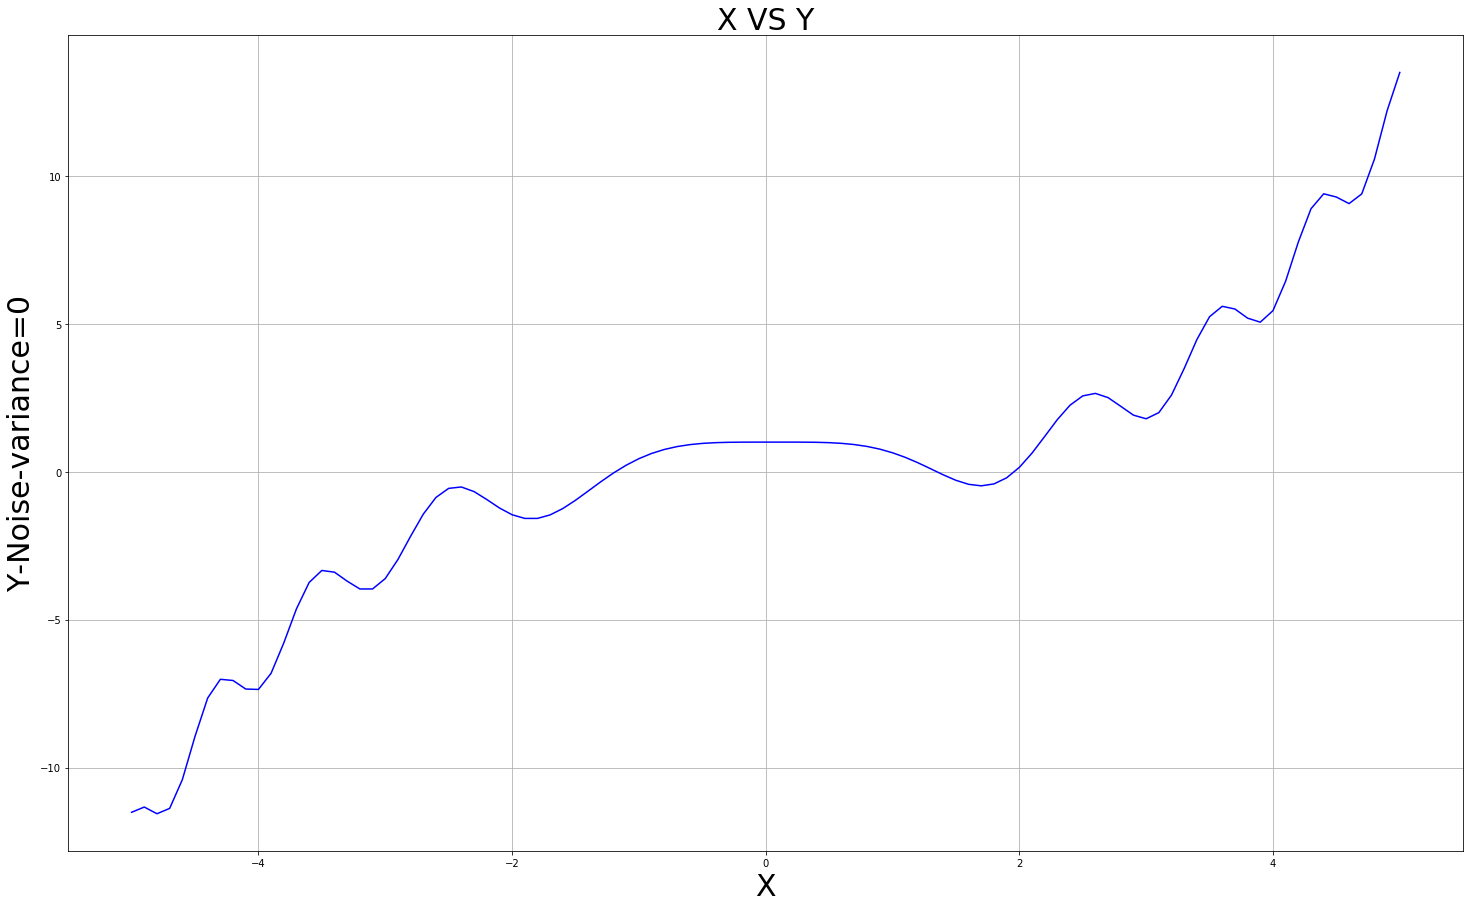

In [182]:
from pylab import rcParams
# Adjusting the plot size
rcParams['figure.figsize'] = 25, 15
plt.grid()
# PLotting the Input value x and output for given noise level zero
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### True Lines for variours gaussian noise levels :-

A multiple line plot is plotted to understand the true line of the equation for noise variances from 0 to 1 level.


The Below graphs represent the Truth graph with various noise level added to the data set. The sigma values are varied from 0.1, 0.2, 0.5, 1.0 variance.

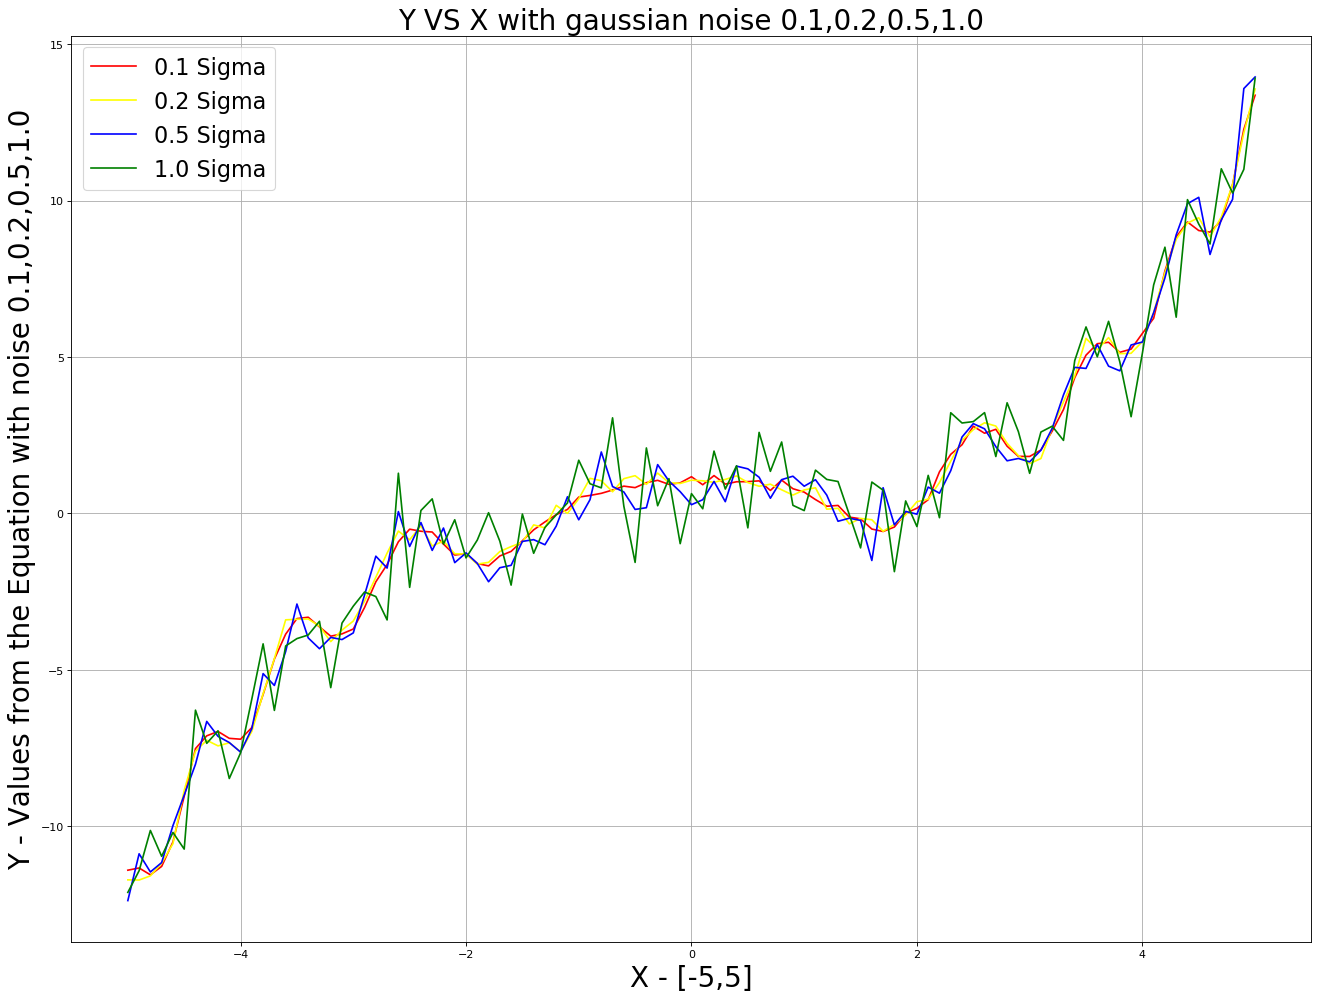

In [183]:
# Controlling the size of the graph and color.
plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
params = {'legend.fontsize': 20,'legend.handlelength': 2}
plt.rcParams.update(params)
plt.grid()
# Line graph for various noise levels and variables are self explanatory.
plt.plot(mandata['X'], mandata['Y_0.1_GNOISE'],color='red',label='0.1 Sigma')
plt.plot(mandata['X'], mandata['Y_0.2_GNOISE'],color='yellow',label='0.2 Sigma')
plt.plot(mandata['X'], mandata['Y_0.5_GNOISE'],color='blue',label='0.5 Sigma')
plt.plot(mandata['X'], mandata['Y_1_GNOISE'],color='green',label='1.0 Sigma')
plt.ylabel('Y - Values from the Equation with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.xlabel('X - [-5,5]',fontsize=25)
plt.title('Y VS X with gaussian noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.legend()
plt.show()

### Performing the regression for variance noise levels.

plotting the obtained prediction value for each noise level from the **myregression** equation and plotting a grouped plot to find the match between predicted values and true values.

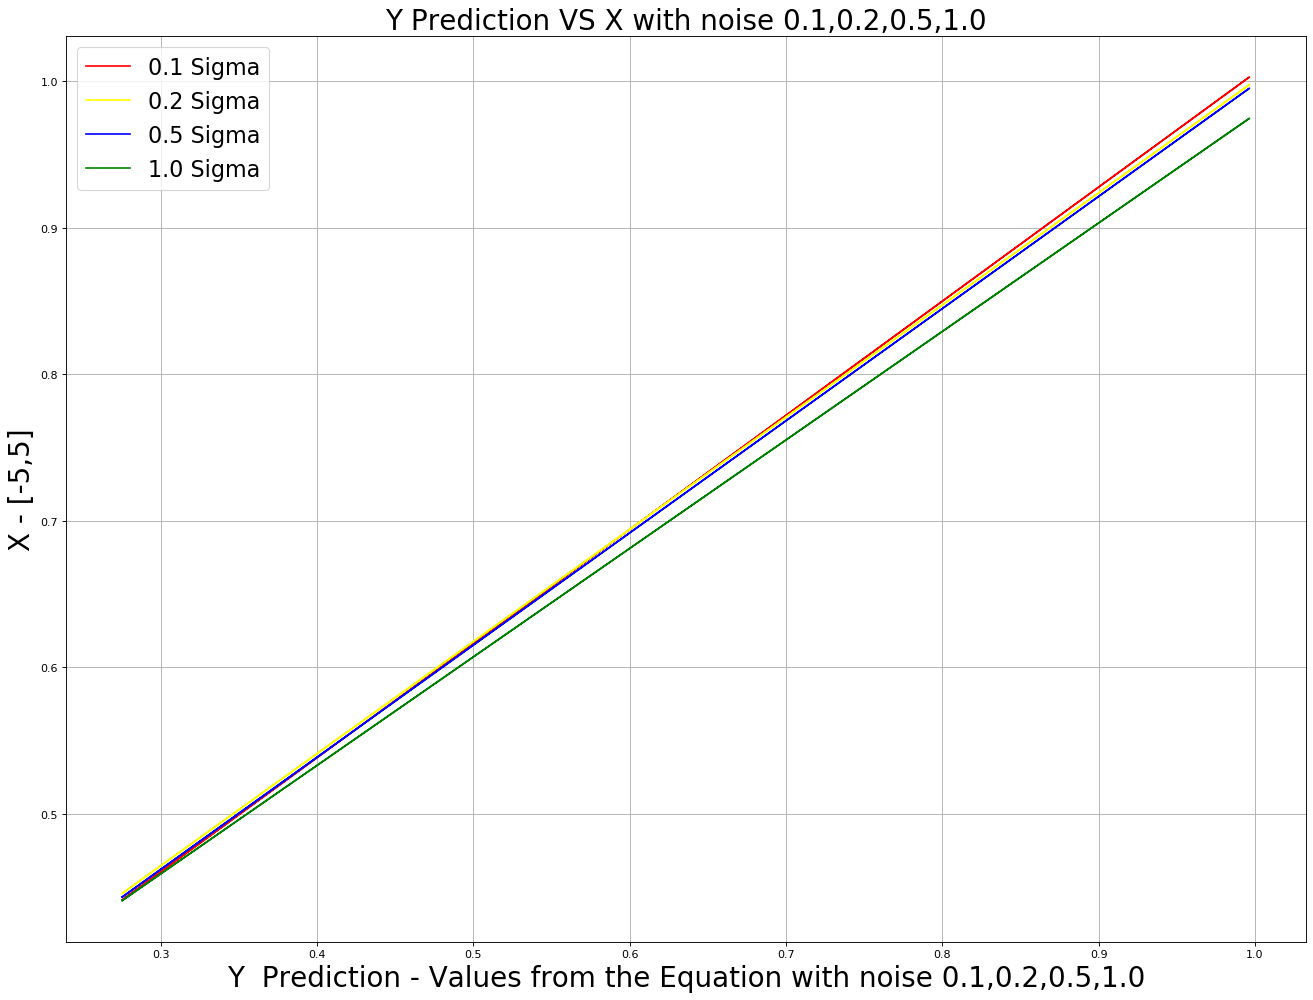

In [184]:
# Adjusting the FIg size and Color.
plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
params = {'legend.fontsize': 20,'legend.handlelength': 2}
plt.rcParams.update(params)
plt.grid()
# Passing each input value and noise variance from 0.1 to 1 gaussian noise
plt.plot(data_prediction['X'], data_prediction['Y_pred_0.1_GNOISE'],color='red',label='0.1 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_0.2_GNOISE'],color='yellow',label='0.2 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_0.5_GNOISE'],color='blue',label='0.5 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_1_GNOISE'],color='green',label='1.0 Sigma')
plt.xlabel('Y  Prediction - Values from the Equation with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.ylabel('X - [-5,5]',fontsize=25)
plt.title('Y Prediction VS X with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.legend()
plt.show()

### 5 Fold Cross Validation for 2, 5, 10, 20, 50, 100, 200, 500 data points.

Creating a table for recording MSE for each set of Data Points.

### Step 1 :-

Creating a dataframe with input x values and corresponding output values for various gaussian noise levels.

In [187]:
# Dividing x to obtain various number of data points.
x=np.arange(-5,5,10/1000).tolist()
x=[round(elem,2) for elem in x]
df=pd.DataFrame(x)
df2=pd.DataFrame()
noise=pd.DataFrame()
# Adding various noise levels to output.
for l in [0,0.1,0.2,0.5,1]:
    u=[]
    for i in x:
        u.append(np.cos(i**2)+(0.1*(i**3))+np.random.normal(0,l)) 
    noise[l]=u
#scaling y_test
df2=pd.concat([df,noise],ignore_index=True,axis=1, sort=False)
# Creating a dataframe containing 500 data points for the cross validation.
df2.columns=['X','Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
df2.head()

,X,Y_0_GNOISE,Y_0.1_GNOISE,Y_0.2_GNOISE,Y_0.5_GNOISE,Y_1_GNOISE
0,-5.00,-11.508797,-11.652702,-11.808445,-11.626480,-10.193884
1,-4.99,-11.452089,-11.605323,-11.494771,-11.059357,-12.224578
2,-4.98,-11.405318,-11.398099,-11.623334,-11.092088,-10.366349
3,-4.97,-11.368151,-11.576493,-11.468429,-11.306643,-12.140856
4,-4.96,-11.340164,-11.434726,-10.914337,-12.213064,-9.990936


### Step 2:- 

Passing each set of data points and performing the 5 fold cross validation and obtaining the mse values for each set of data points i.e. [2, 5, 10, 20, 50, 100, 500].
Recording the MSE values for each noise levels i.e from [0, 0.1, 0.2, 0.5, 1.0].

Getting the two best and worst prediciton values is a feature of the code set below.

In [189]:
MSE=pd.DataFrame()
xtest=[]
mypredictions = []
mymse = []
for i in range(1,6):
    mse=[]
    df1 = df2.iloc[:, [0,i]]
    for j in ([2,5,10,20,50,100,200,500]):
        #df3=df1.sample(n = j)
        X_train = df1.sample(n = j)
        #print('xtrain ',j,'\n',X_train.shape)
        X_test = df1.sample(n= len(df1)-j).iloc[:,:-1].reset_index(drop=True)
        #print('Xtest ',j,'\n',X_test.shape)
        y_test = df1.sample(n= len(df1)-j).iloc[:,-1:].reset_index(drop=True).to_numpy()
        # Scaling the y test or validation set also.
        y_test = (y_test-y_test.mean())/y_test.std()
        y_test = np.exp(-(y_test-y_test.mean())**2/(2*(y_test.std())**2)) #gaussian regularization
        xtest.append(X_test.to_numpy())
        #print('ytest ',j,'\n',y_test)
        # Calling my regression function by passing X train and X test.
        pred=my_regression(X_train, X_test, 1)
        #print('Pred',pred)
        mypredictions.append(pred)
        me=((pred-y_test)**2).sum()/len(pred)
        mymse.append(me)
        mse.append(me)
    MSE[i]=mse
# Creating a Dataset to hold MSE values of each combinaiton.
MSE.columns=['Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
MSE.index=[2,5,10,20,50,100,200,500]
# Sorting the obtained MSE values to get Highest MSE or worst two values 
ind_worst = np.asarray(mymse).argsort()[-2:][::-1]
ind_best = np.asarray(mymse).argsort()[:2][::1]
worst_prediction = [np.asarray(mypredictions[i][0]) for i in ind_worst]
worst_test = [xtest[i].flatten() for i in ind_worst]
best_prediction = [np.asarray(mypredictions[i][0]) for i in ind_best]
best_test = [xtest[i].flatten() for i in ind_best]
print(MSE)

        Y_0_GNOISE   Y_0.1_GNOISE   Y_0.2_GNOISE   Y_0.5_GNOISE     Y_1_GNOISE
2    111442.267827  111425.158052  111281.635633  111073.071152  107620.921876
5    116877.860610  171991.669551  190359.350351  106989.792901  235409.844882
10   191611.228316  153333.121701  205766.908121  162728.841403  167188.567142
20   224338.964774  163038.496935  183920.568537  194117.108102  161670.650533
50   177148.826336  160933.391784  152640.870728  160689.693743  150256.099232
100  142447.258628  167840.444218  142300.161412  137775.379654  126773.598996
200  114760.454565  116794.402165  122013.248450  124951.485639  109110.516274
500   46085.874989   46499.596200   45456.706664   45886.030219   41156.482946


### Plotting the two Best Predictions on the true graph with guasssian variance=0

Scatter plot for first best value at index zero.

Text(0.5, 1.0, 'X VS Y')

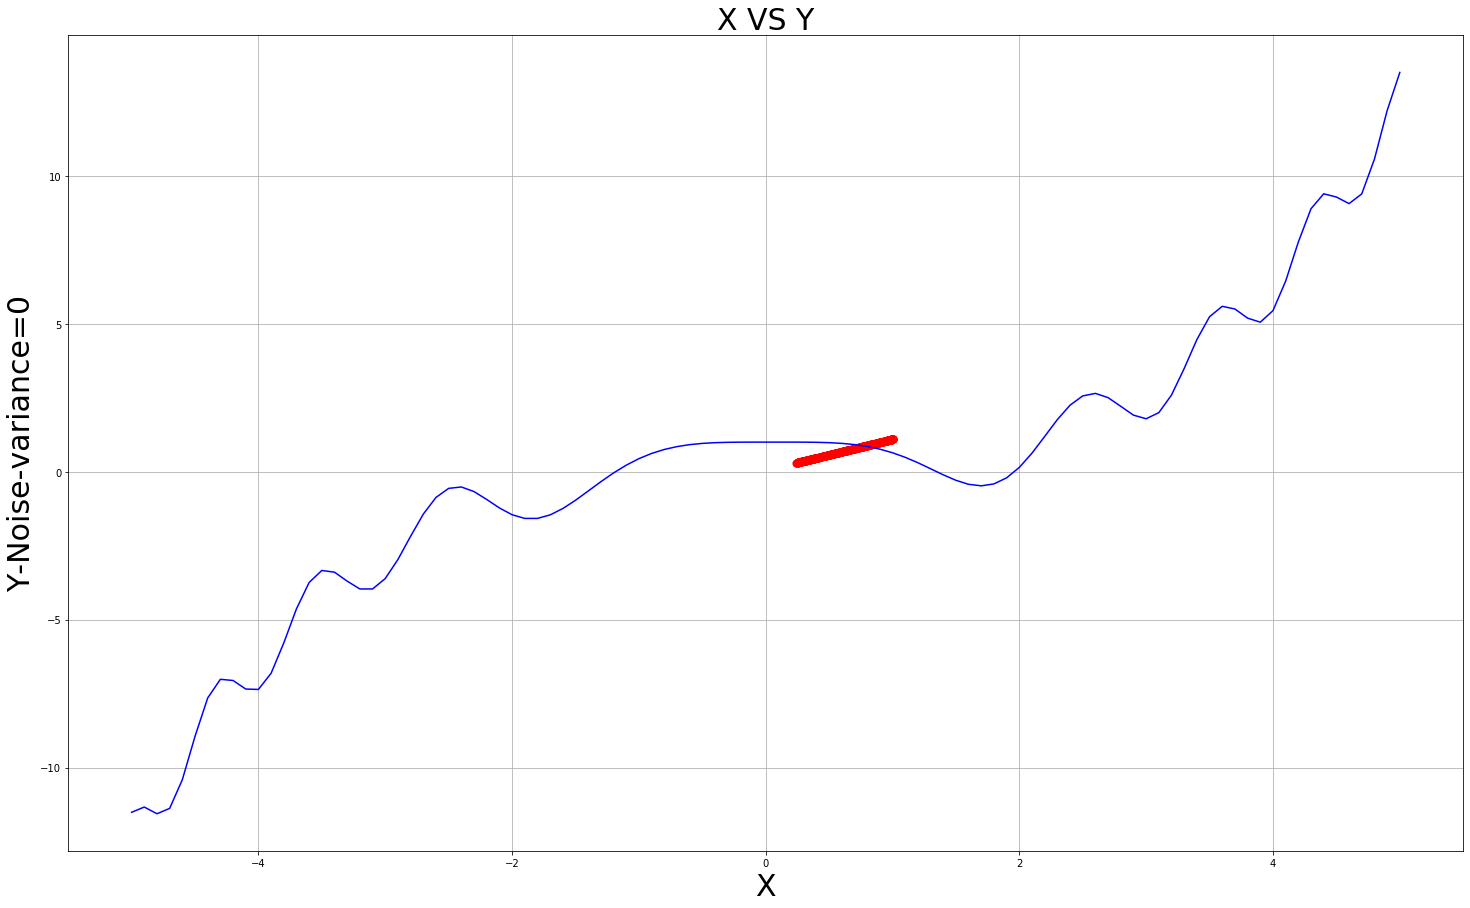

In [191]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.scatter(best_test[0],best_prediction[0],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### Second best plot on the true line with gaussian variance zero.


Text(0.5, 1.0, 'X VS Y')

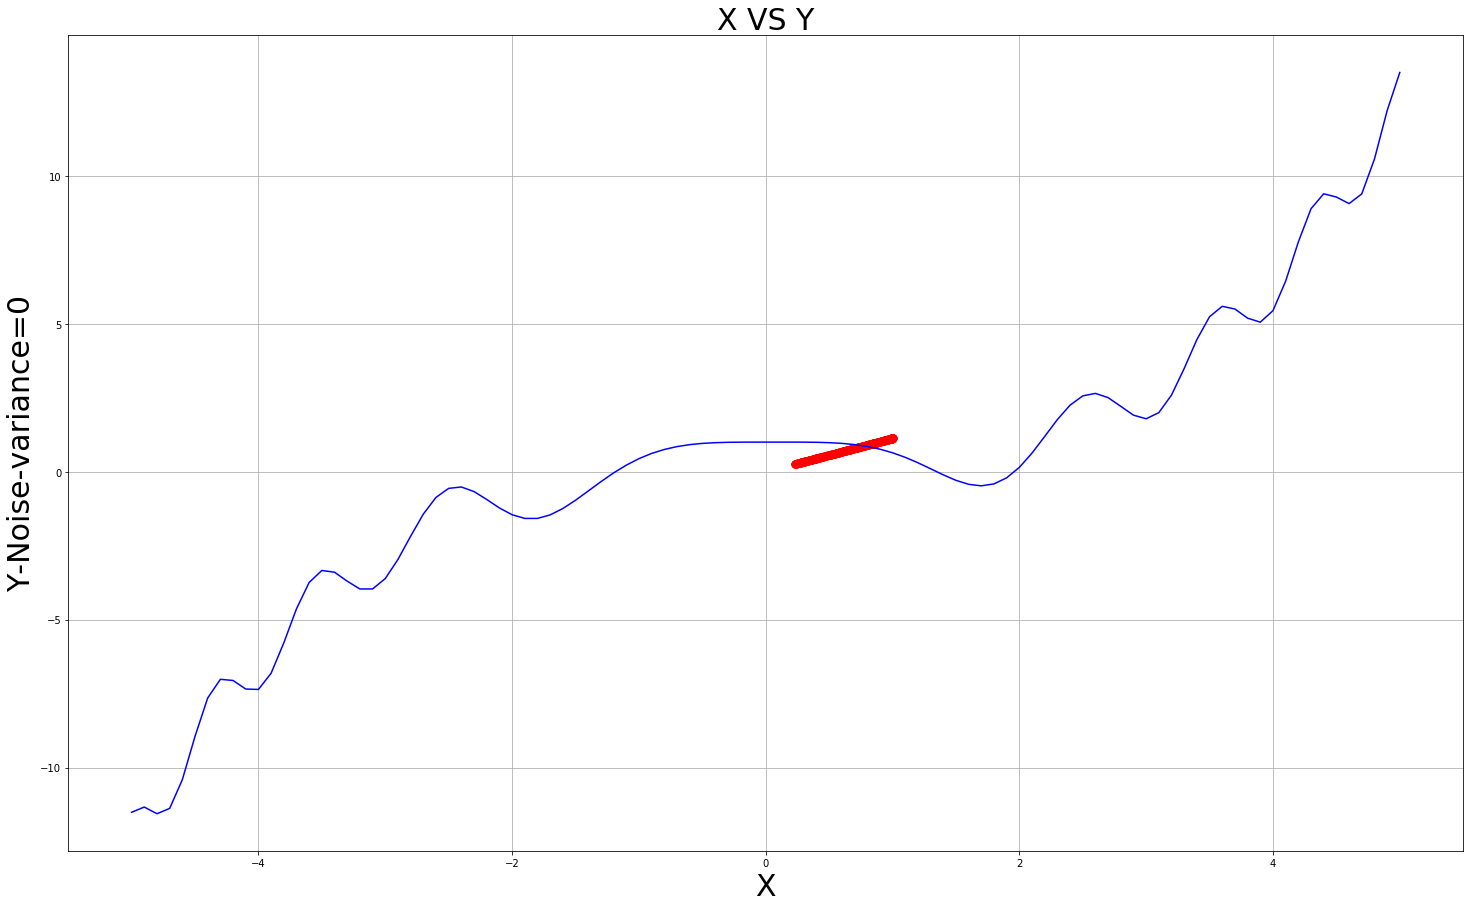

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
# Selection of the point.
plt.scatter(best_test[1],best_prediction[1],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### PLotting the two worst predictions on the True graph.

Selection of the prediction values which were sorted in the previous steps in order plot.

Text(0.5, 1.0, 'X VS Y')

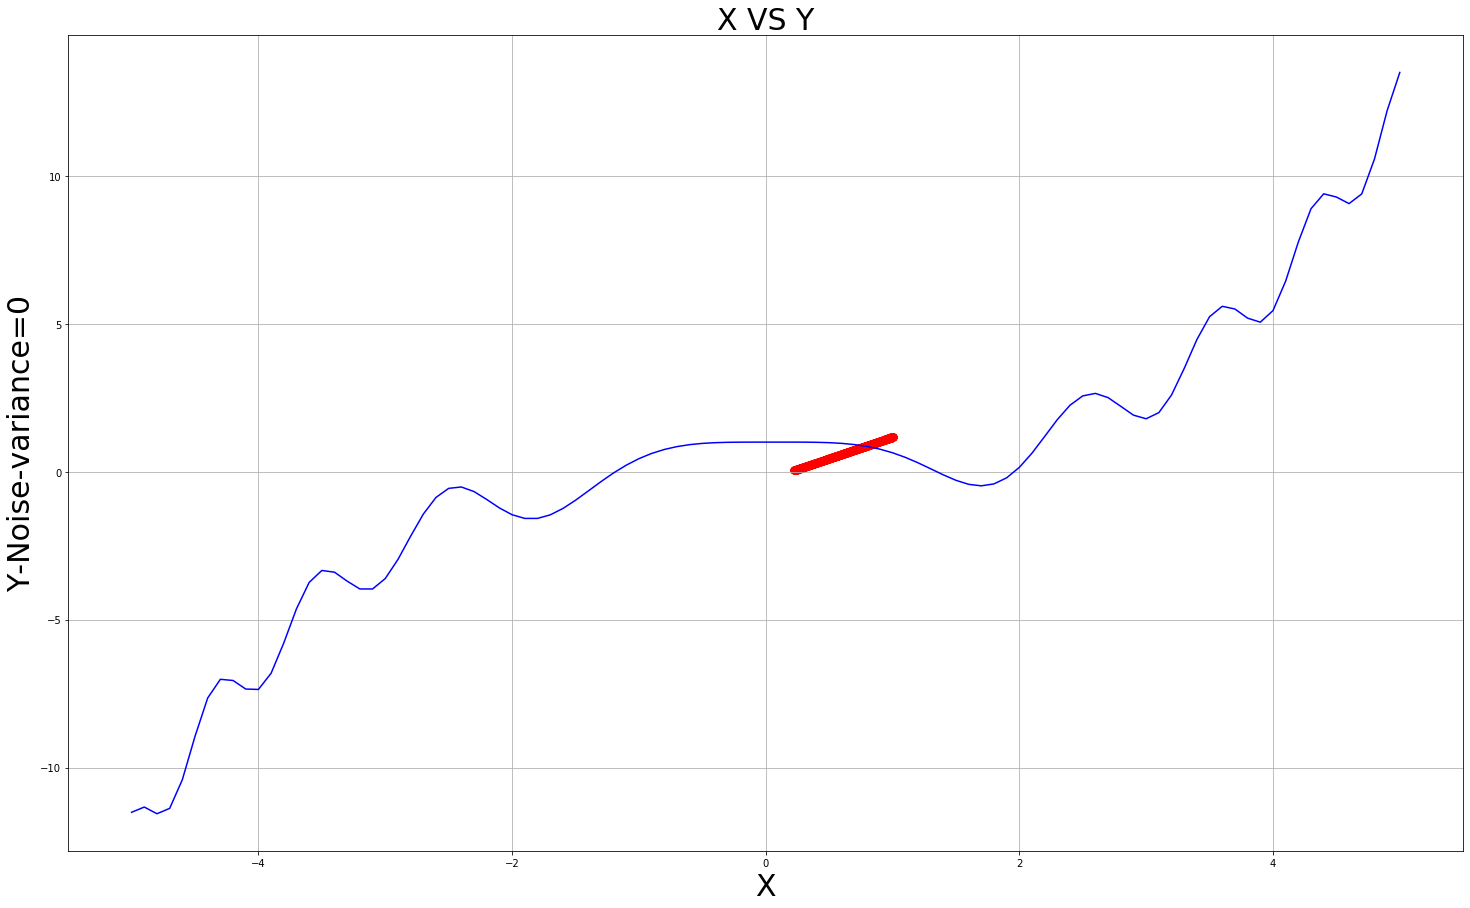

In [193]:
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
# Scatter plot of Worst prediciton value.
plt.scatter(worst_test[0],worst_prediction[0],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### Second worst Prediction.

Text(0.5, 1.0, 'X VS Y')

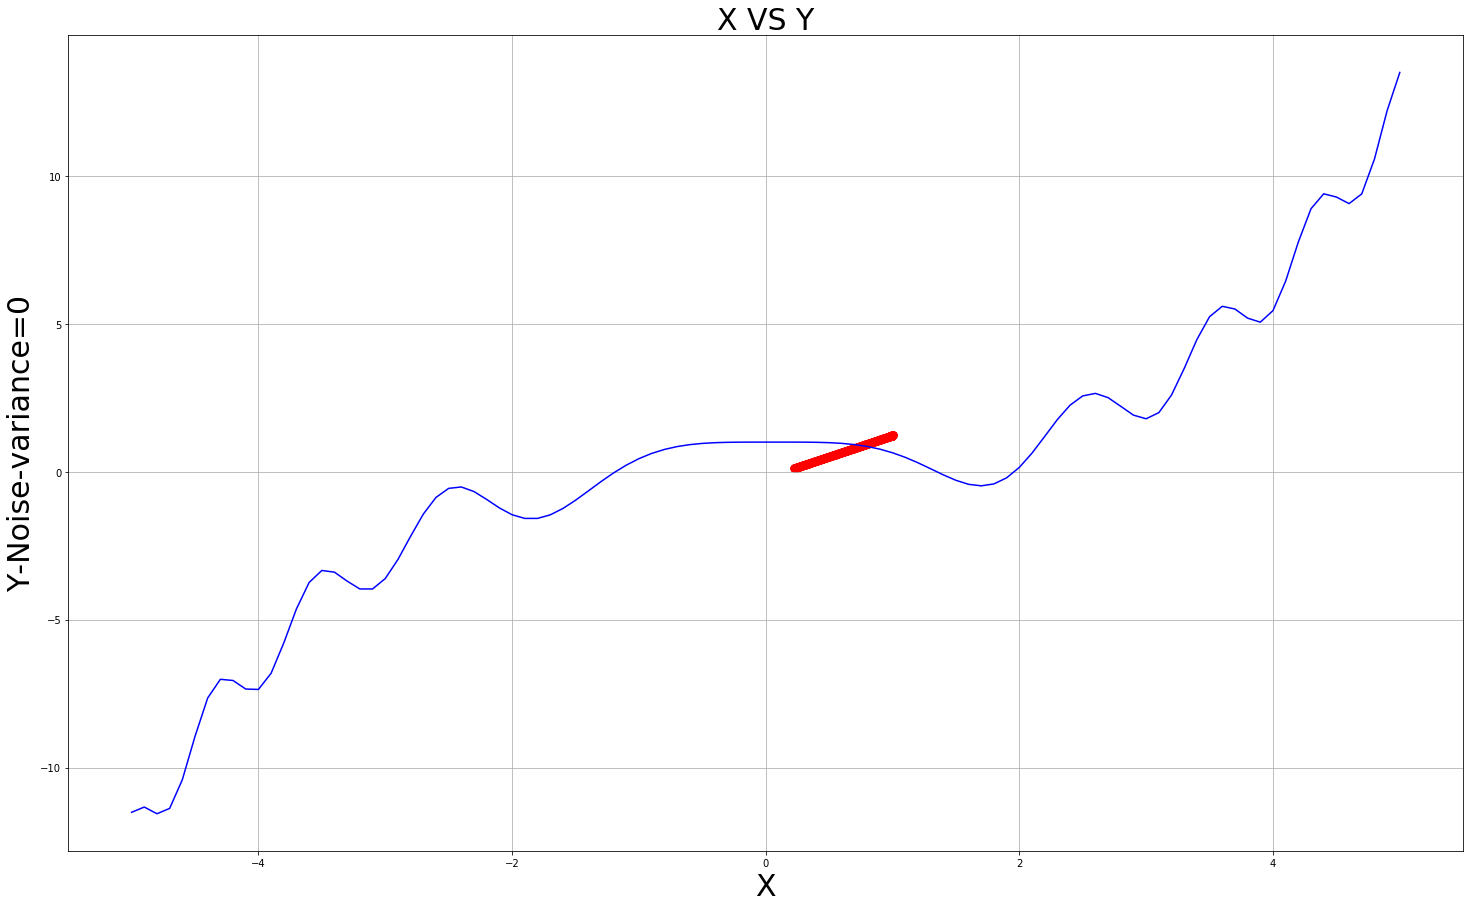

In [194]:
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.scatter(worst_test[1],worst_prediction[1],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

***Conclusion*** :- The Results obtained from the data generated through the 1-d equation given, the results obtained 
were fairly good with higher Mean Squared Error vlaues.

### observation:-
1. The standard deviation of the data set is decresed to significant amount after scaling and guassian regularization.
2. The addition of noise to the dataset decreases the accuracy of the prediction. 
3. POlynomial regression did not provide better results.
4. The simple regression came out as the best solution.

### Testing the myregreesion function on UCI data sets and 5 Fold Cross-Validation.

### 1. AirFoil Self-Noise Data Set:-

NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three dimensional airfoil blade sections conducted in an anechoic wind tunnel.

Input Attributes:-

1. Frequency, in Hertz
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meteres.

Output Attributes:-

1. Scaled sound pressure level, in decibels.

In [195]:
data_2 = pd.read_csv('airfoil_self_noise.dat',delimiter='\t',header=None)
X_train_2 = data_2.sample(frac=0.8,random_state=0)
X_test_2 = data_2.sample(frac=0.2,random_state=0).iloc[:,:-1]
y_test_2= data_2.sample(frac=0.2,random_state=0).iloc[:,-1:]
ypreds_2 = my_regression(X_train_2, X_test_2, 1)
#scaling y_test
for col,pred in zip(y_test_2.columns,ypreds_2): 
        y_test_2[col] = (y_test_2[col]-y_test_2[col].mean())/y_test_2[col].std() #scaling
        y_test_2[col] = np.exp(-(y_test_2[col]-y_test_2[col].mean())**2/(2*(y_test_2[col].std())**2)) #gaussian regularization
        print('The Mean Square Error For Sound Pressure:',((pred-y_test_2[col])**2).sum()/len(pred))

The Mean Square Error For Sound Pressure: 0.0696162191750923


### 2. Yacht Hydrodynamics Data Set.

Delft data set, used to predict the hydrodynamic performance of sailing yachts from dimensions and velocity

Prediction of residuary resistance of sailing yachts at the intial design stage is of a great value of evaluating the ship.

Input Attributes:-

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.

Output Attributes:-

1. Residuary resistance per unit weight of displacement, adimensional.

In [196]:
data_3 = pd.read_csv('yacht_hydrodynamics.data',delimiter='\s+',header=None)
X_train_3 = data_3.sample(frac=0.8,random_state=0)
X_test_3 = data_3.sample(frac=0.2,random_state=0).iloc[:,:-1]
y_test_3= data_3.sample(frac=0.2,random_state=0).iloc[:,-1:]

ypreds_3 = my_regression(X_train_3, X_test_3, 1)
#scaling y_test
for col,pred in zip(y_test_3.columns,ypreds_3): 
        y_test_3[col] = (y_test_3[col]-y_test_3[col].mean())/y_test_3[col].std() #scaling
        y_test_3[col] = np.exp(-(y_test_3[col]-y_test_3[col].mean())**2/(2*(y_test_3[col].std())**2)) #gaussian regularization
        print('The Mean Square Error For Sound Resistance per unit weight',((pred-y_test_3[col])**2).sum()/len(pred))

The Mean Square Error For Sound Resistance per unit weight 0.04152763910991076


### Testing the myregreesion function on UCI data sets and 5 Fold Cross-Validation.

3. Slump Test DataSet:- Concrete is a highly complex material. The slump flow of concrete is not only determined by the water content, but that is also influenced by other concrete ingredients.

Input Attributes:-
1. Cement
2. Slag.
3. FLyash.
4. Water.
5. SP
6. Coarse Aggr.
7. FIne Aggr

Output Attributes
1. SLump (CM)
2. FLow(CM)
3. 28-day Compressive strength(MPA)

In [197]:
data_1 = pd.read_csv('slump_test.data')
X_train_1 = data_1.sample(frac=0.8,random_state=0).iloc[:,1:]
X_test_1 = data_1.sample(frac=0.2,random_state=0).iloc[:,1:-3]
y_test_1= data_1.sample(frac=0.2,random_state=0).iloc[:,-3:]

ypreds_1 = my_regression(X_train_1, X_test_1, 3)
#scaling y_test
for col,pred in zip(y_test_1.columns,ypreds_1): 
        y_test_1[col] = (y_test_1[col]-y_test_1[col].mean())/y_test_1[col].std() #scaling
        y_test_1[col] = np.exp(-(y_test_1[col]-y_test_1[col].mean())**2/(2*(y_test_1[col].std())**2)) #gaussian regularization
        print(col,'\n','The Mean Square Error:',((pred-y_test_1[col])**2).sum()/len(pred))

SLUMP(cm) 
 The Mean Square Error: 0.051427628587625375
FLOW(cm) 
 The Mean Square Error: 0.04608049962260301
Compressive Strength (28-day)(Mpa) 
 The Mean Square Error: 0.07653860584840347


**Conclusion** :
    
A simple linear, polynomial Regression function has been developed and cross validation has been implemented. Various steps taken to improve the model selection through the implementation of Gaussian Basis function.
Generation of manual data from the given equation, the results obtained were fairly good with little higher Mean Squared Error values. 

###  The Regression function worked perfectly for UCI data sets and the MSE were fairly small. The obtained MSE for the data sets are :-

1. Air Foil Dataset :- 

***MSE 0.0696162191750923***

2. Yacht Hydrodynamics:-

***MSE - 0.04152***

3. Slump Test DataSet:-

***MSE - SLump - 0.05142***
***MSE - FLow  - 0.04608***
***MSE - COmpressive Strength - 0.07653***